**1C)** Write code that produces the truth table (filled with True/False) of the logical statement and the input-output table (filled with +1/ − 1) of the analytic equation, and verify that they match. (In your main submission, include the outputted tables. In the code submission, include your code.)

In [23]:
import numpy as np

def sign(v):
  if v == 0:
    return 0
  else:
    return 1 if v > 0 else -1

def neuralNetwork(x1, x2, x3):
  w1 = [1,1,-1]
  b1 = -2
  y1 = sign(x1*w1[0] + x2*w1[1] + x3*w1[2] + b1) # (x1 ∧ x2 ∧ ¬x3)

  w2 = [0,-1,1]
  b2 = -1
  y2 = sign(x1*w2[0] + x2*w2[1] + x3*w2[2] + b2) # (¬x2 ∧ x3)

  u = [1,1]
  c = 1
  y = sign((y1*u[0] + y2*u[1]) + c) # (x1 ∧ x2 ∧ ¬x3) v (¬x2 ∧ x3)
  return y

def logicalConvertor(x):
  return True if x == 1 else False

def logicalComputation(x1, x2, x3):
  term1 = logicalConvertor(x1) and logicalConvertor(x2) and not(logicalConvertor(x3))  # (x1 ∧ x2 ∧ ¬x3)
  term2 = not(logicalConvertor(x2)) and logicalConvertor(x3)         # (¬x2 ∧ x3)

  output = term1 or term2 # (x1 ∧ x2 ∧ ¬x3) v (¬x2 ∧ x3)
  return "True" if output else "False"

def generate_truth_table():
  inputs = np.array([[1, 1, 1], [1, 1, -1], [1, -1, 1], [1, -1, -1],
                      [-1, 1, 1], [-1, 1, -1], [-1, -1, 1], [-1, -1, -1]])

  print(f"{'x1':^5} {'x2':^5} {'x3':^5} {'Logical':^15} {'NN':^10}")
  print("-" * 45)

  for x1, x2, x3 in inputs:
      logic_out = logicalComputation(x1, x2, x3)
      nn_out = neuralNetwork(x1, x2, x3)
      print(f"{x1:^5} {x2:^5} {x3:^5} {logic_out:^15} {nn_out:^10}")

generate_truth_table()


 x1    x2    x3       Logical         NN    
---------------------------------------------
  1     1     1        False          -1    
  1     1    -1        True           1     
  1    -1     1        True           1     
  1    -1    -1        False          -1    
 -1     1     1        False          -1    
 -1     1    -1        False          -1    
 -1    -1     1        True           1     
 -1    -1    -1        False          -1    


**2C)** Write a Python program that does the following: • Samples1,000randompoints x fromauniformdistribution over the square [−2,2]2. • Calculates the output of the neural network y = f(x) for each point. • Plots ascatter plot of all points x, where the points are blue when y = 0 and the points are red when y = 1. Submit your code and report its output.

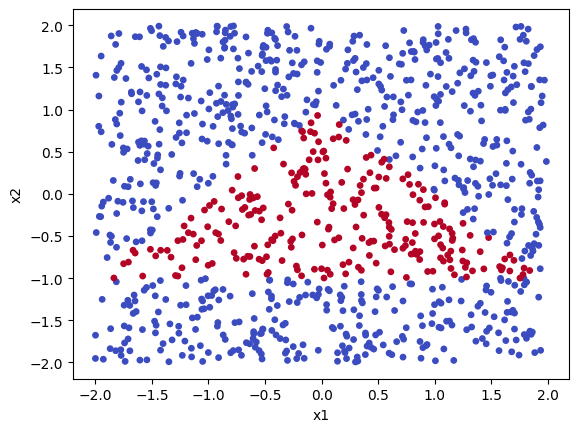

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def step(v):
    return np.where(v >= 0, 1, 0)

W = np.array([[1, -1, 0], [-1, -1, -1]])
b = np.array([1, 1, -1])
U = np.array([1, 1, -1])
c = np.array([-1.5])

def neuralNetwork(x):
    hidden_layer = step(np.dot(x, W) + b)
    output = step(np.dot(hidden_layer, U) + c)
    return output

np.random.seed(102)
points = np.random.uniform(-2, 2, (1000, 2))
outputs = np.array([neuralNetwork(point) for point in points])

plt.scatter(points[:, 0], points[:, 1], c=outputs, cmap='coolwarm', s=15)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()
